In [1]:
import numpy as np
import matplotlib.cm as cm
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy as sp

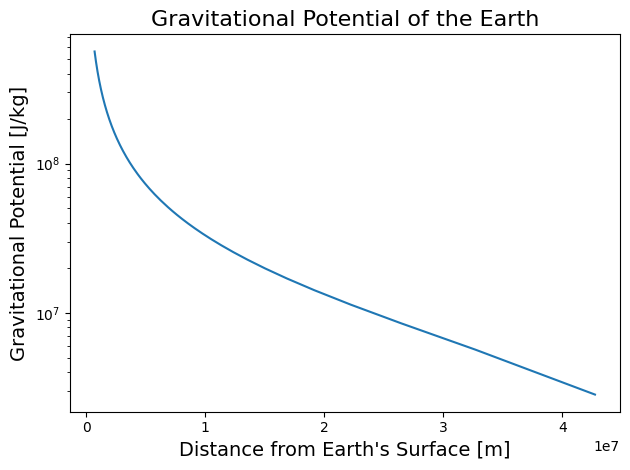

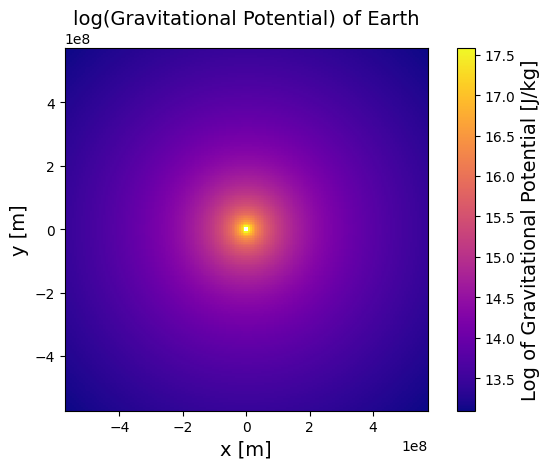

In [58]:
# Part 1: The Gravitational Potential of the Earth

earth_rad = 6.378E6
dist_em = 3.8E8
earth_mass = 5.9E24

nx = 200
ny = 200

x0 = np.linspace(earth_rad, 1.5*dist_em, nx)


x = np.linspace(-1.5*dist_em, 1.5*dist_em, nx)
y = np.linspace(-1.5*dist_em, 1.5*dist_em, ny)

x_grid, y_grid = np.meshgrid(x,y)


phi_vals_rad = np.zeros(nx)
phi_vals_grid = np.zeros((ny,nx))

def grav_pot(M, xm, ym, x, y, r_excluded):
    r_vec = np.array([x-xm, y-ym])
    r = np.linalg.norm(r_vec)
    if r<=r_excluded:
        phi = np.nan
    else:
        phi = -(M*sp.constants.G)/r
    return phi

for x in range(nx):
    phi_vals_rad[x] += np.abs(grav_pot(earth_mass, 0, 0, x0[x], 0, earth_rad))


for y in range(ny):
    for x in range(nx):
        phi_vals_grid[y,x] += grav_pot(earth_mass, 0, 0, x_grid[y,x], y_grid[y,x], earth_rad)

dist_from_earth = x0 - earth_rad

fig, ax1 = plt.subplots()
ax1.plot(phi_vals_rad, dist_from_earth)
ax1.set_xlabel("Distance from Earth's Surface [m]", fontsize = 14)
ax1.set_ylabel("Gravitational Potential [J/kg]", fontsize = 14)
ax1.set_yscale("log")
ax1.set_title("Gravitational Potential of the Earth", fontsize = 16)
fig.tight_layout()

colors = np.log(np.abs(phi_vals_grid))

fig2,ax2 = plt.subplots()
cmesh = ax2.pcolormesh(x_grid, y_grid, np.log(np.abs(phi_vals_grid)), cmap = cm.plasma)
cbar = fig2.colorbar(cmesh)
ax2.set_aspect("equal")
ax2.set_xlabel("x [m]", fontsize = 14)
ax2.set_ylabel("y [m]", fontsize = 14)
ax2.set_title("log(Gravitational Potential) of Earth", fontsize = 14)
cbar.set_label("Log of Gravitational Potential [J/kg]", fontsize = 14)

fig2.tight_layout()

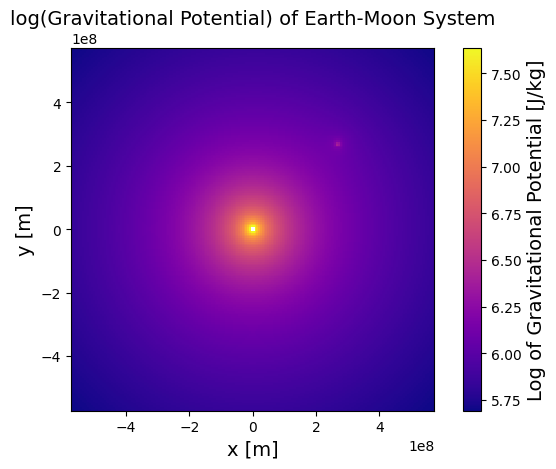

In [59]:
# Part 2

phi_vals_grid_em = np.zeros((ny,nx))
moon_mass = 7.3E22
moon_rad = 1.737E6

for y in range(ny):
    for x in range(nx):
        phi_vals_grid_em[y,x] = grav_pot(earth_mass, 0, 0, x_grid[y,x], y_grid[y,x], earth_rad) + grav_pot(moon_mass, dist_em/np.sqrt(2),dist_em/np.sqrt(2),x_grid[y,x], y_grid[y,x], moon_rad)

fig2, ax2 = plt.subplots()
cmesh2 = ax2.pcolormesh(x_grid, y_grid, np.log10(np.abs(phi_vals_grid_em)), cmap = cm.plasma)
cbar2 = fig2.colorbar(cmesh2)
ax2.set_xlabel("x [m]", fontsize = 14)
ax2.set_ylabel("y [m]", fontsize = 14)
ax2.set_title("log(Gravitational Potential) of Earth-Moon System", fontsize = 14)
ax2.set_aspect("equal")
cbar2.set_label("Log of Gravitational Potential [J/kg]", fontsize = 14)
fig2.tight_layout()

Text(0.5, 1.0, 'log(Gravitational Potential) of Earth-Moon System')

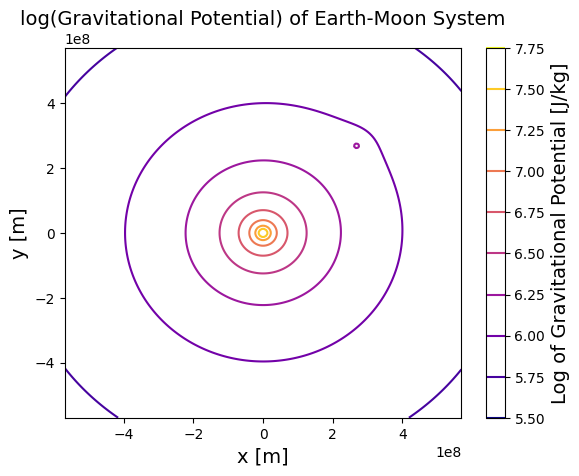

In [63]:
fig, ax = plt.subplots()
contour = ax.contour(x_grid,y_grid, np.log10(np.abs(phi_vals_grid_em)), cmap = cm.plasma)
cbar = fig.colorbar(contour)
ax.set_xlabel("x [m]", fontsize = 14)
ax.set_ylabel("y [m]", fontsize = 14)
cbar.set_label("Log of Gravitational Potential [J/kg]", fontsize = 14)
ax.set_title("log(Gravitational Potential) of Earth-Moon System", fontsize = 14)

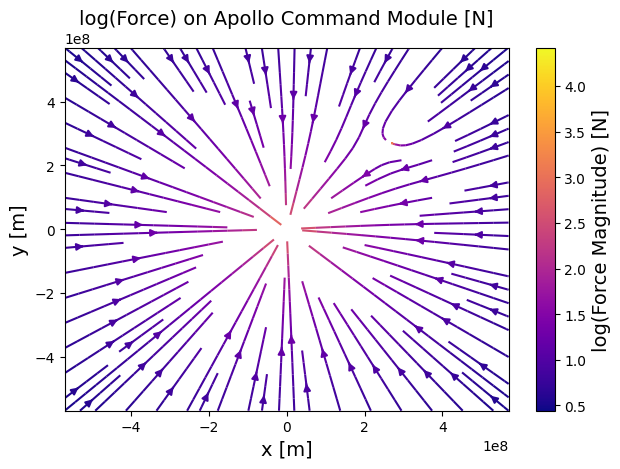

In [68]:
# Part 3

apollo_mass = 5.500E3
force_apollo_x = np.zeros((ny,nx))
force_apollo_y = np.zeros((ny,nx))

def grav_force(M,m,X,Y,x,y, r_excluded):
    r21 = np.array([x-X,y-Y])
    r21_sq = (x-X)**2 + (y-Y)**2
    if r21_sq <= r_excluded**2:
        Fx = np.nan
        Fy = np.nan
    else:
        r21_hat = r21/np.linalg.norm(r21)
        F21 = -(sp.constants.G*M*m/(r21_sq))*r21_hat
        Fx = F21[0]
        Fy = F21[1]
    return Fx, Fy

for y in range(ny):
    for x in range(nx):
        force_apollo_x[y,x] = grav_force(earth_mass, apollo_mass, 0, 0, x_grid[y,x], y_grid[y,x], earth_rad)[0] + grav_force(moon_mass, apollo_mass, dist_em/np.sqrt(2), dist_em/np.sqrt(2), x_grid[y,x], y_grid[y,x], moon_rad)[0] 
        force_apollo_y[y,x] = grav_force(earth_mass, apollo_mass, 0, 0, x_grid[y,x], y_grid[y,x], earth_rad)[1] + grav_force(moon_mass, apollo_mass, dist_em/np.sqrt(2), dist_em/np.sqrt(2), x_grid[y,x], y_grid[y,x], moon_rad)[1] 
fig, ax = plt.subplots()
colors = np.log10(np.hypot(force_apollo_x, force_apollo_y))
stream = ax.streamplot(x_grid,y_grid, force_apollo_x, force_apollo_y, color = colors, cmap = cm.plasma)
cbar = fig.colorbar(stream.lines)
cbar.set_label("log(Force Magnitude) [N]", fontsize = 14)
ax.set_xlabel("x [m]", fontsize = 14)
ax.set_ylabel("y [m]", fontsize = 14)
ax.set_title("log(Force) on Apollo Command Module [N]", fontsize = 14)
fig.tight_layout()

In [69]:
# Part 4
dry_mass = 7.5E5
wet_mass = 2.8E6
burn_rate = 1.3E4
v_exh = 2.4E3

burn_time = (wet_mass - dry_mass)/burn_rate

def delta_v(t, wet_mass = wet_mass, dry_mass = dry_mass, burn_rate = burn_rate, v_exh=v_exh, g = sp.constants.g):
    if t<= (wet_mass - dry_mass)/burn_rate:
        m = wet_mass - t*burn_rate
        dv = v_exh*np.log(wet_mass/m) - g*t
    else:
        dv = 0

    return dv

time_vals = np.linspace(0,burn_time, 100)
v_delta_v = np.vectorize(delta_v)

alt, alt_err = quad(v_delta_v, 0, burn_time)

print(f"The peak rocket altitude will be: {alt} m after burning for {burn_time} s")

The peak rocket altitude will be: 74135.63213070547 m after burning for 157.69230769230768 s
